In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4 as nc
import numpy as np
%matplotlib inline

### Load and prepare data

In [2]:
fname = '/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.generated_psi/2018/psi_20180601.nc'
psi2018 = nc.Dataset(fname, 'r', format='NETCDF4')

In [3]:
# define the extent of the data, with the antimeridian as 0
extent = [-75, 85, -15, 75]

lon = psi2018.variables['longitude'][:]
lat = psi2018.variables['latitude'][:]

# extract longitude extent (recall that lon ranges from 0 to 360 in this dataset)
x_idx = np.intersect1d(np.where(lon >= extent[0] + 180), np.where(lon <= extent[1] + 180))
x = lon[x_idx]

# extract latitude extent
y_idx = np.intersect1d(np.where(lat >= extent[2]), np.where(lat <= extent[3]))
y = lat[y_idx]

stream = psi2018.variables['streamfunction'][12, 16, :, :]
z = stream[y_idx, :][:, x_idx]

### Contour plot of atmosphere horizontal streamfunction at 500 millibars

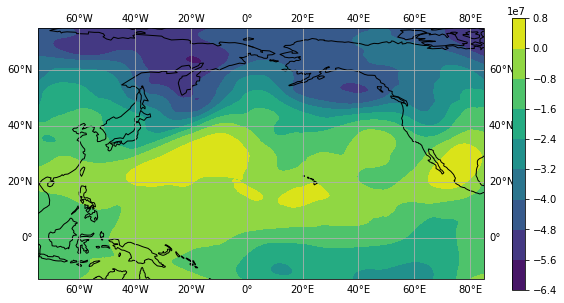

In [4]:
fig = plt.figure(figsize=(10, 5))
proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(extent, crs=proj)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=proj)
filled_c = ax.contourf(x, y, z, transform=ccrs.PlateCarree())
fig.colorbar(filled_c, orientation='vertical')
plt.show()